# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html=browser.html
nasa=BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
row_data=nasa.find_all(class_='data-row')
print(row_data)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
space_list = []

# Loop through the scraped data to create a list of rows
for row in row_data:
    cols = row.find_all('td')
    
  
    if len(cols) >= 7:
        mars_dict = {
            'id': cols[0].get_text(),
            'terrestrial_date': cols[1].get_text(),
            'sol': cols[2].get_text(),
            'ls': cols[3].get_text(),
            'month': cols[4].get_text(),
            'min_temp': cols[5].get_text(),
            'pressure': cols[6].get_text()
        }
        space_list.append(mars_dict)


In [7]:
space_df = pd.DataFrame(space_list)


In [8]:
# Confirm DataFrame was created successfully
space_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
space_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
space_df['terrestrial_date']=pd.to_datetime(space_df['terrestrial_date'], format = '%Y-%m-%d')
space_df['sol']= space_df['sol'].astype(int)
space_df['ls']= space_df['ls'].astype(int)
space_df['month']= space_df['month'].astype(int)
space_df['min_temp']= space_df['min_temp'].astype(float)
space_df['pressure']= space_df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
space_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
space_df['month'].nunique()

12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
space_df['month'].count()

1867

In [14]:
# 3. What is the average minimum temperature by month?
monthly_temp=space_df.groupby('month')['min_temp'].mean().reset_index()
monthly_temp

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


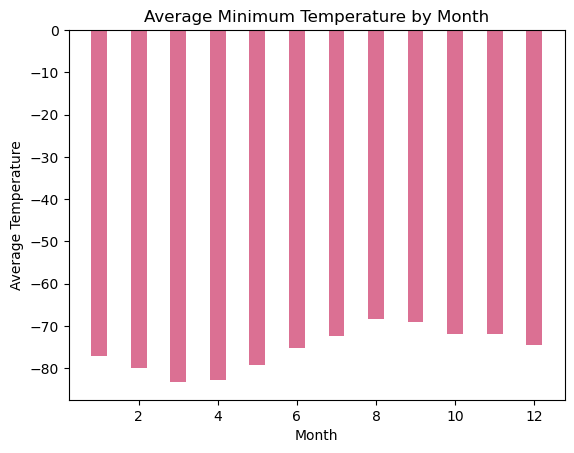

In [15]:
# Plot the average minimum temperature by month
monthly_temp.columns=['month','average_min_temp']
plt.bar(x= monthly_temp['month'], height=monthly_temp['average_min_temp'], color='palevioletred', width=.4)
plt.xlabel("Month")
plt.ylabel("Average Temperature")
plt.title("Average Minimum Temperature by Month")
plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
cold_month= monthly_temp.loc[monthly_temp['average_min_temp'].idxmin()]
hot_month= monthly_temp.loc[monthly_temp['average_min_temp'].idxmax()]
print(cold_month)
print(hot_month)

month                3.000000
average_min_temp   -83.307292
Name: 2, dtype: float64
month                8.000000
average_min_temp   -68.382979
Name: 7, dtype: float64


In [17]:
# 4. What is the average pressure by month?
monthly_pressure=space_df.groupby('month')['pressure'].mean().reset_index()
monthly_pressure

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


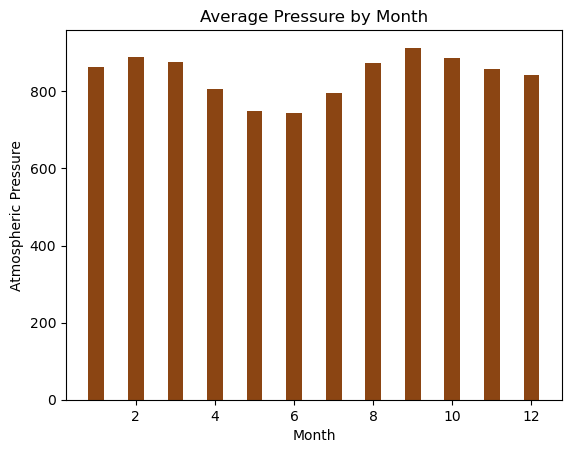

In [18]:
# Plot the average pressure by month
monthly_pressure.columns=['month','average_pressure']
plt.bar(x= monthly_pressure['month'], height=monthly_pressure['average_pressure'], color='saddlebrown', width=.4)
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.title("Average Pressure by Month")
plt.show()

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
high_pressure = monthly_pressure.loc[monthly_pressure['average_pressure'].idxmax()]
low_pressure = monthly_pressure.loc[monthly_pressure['average_pressure'].idxmin()]
print(high_pressure)
print(low_pressure)

month                 9.00000
average_pressure    913.30597
Name: 8, dtype: float64
month                 6.000000
average_pressure    745.054422
Name: 5, dtype: float64


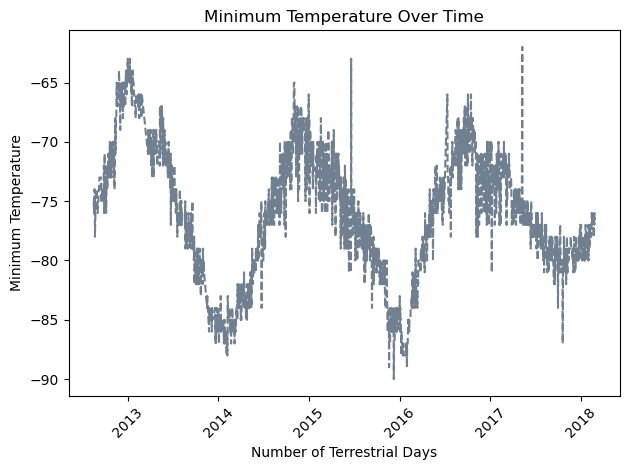

In [30]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(space_df['terrestrial_date'], space_df['min_temp'], marker='', linestyle='dashed', color='slategray')
plt.title("Minimum Temperature Over Time")
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Minimum Temperature

***
Based on the minimum temperatures on Mars, we can assume that the mars climate is incompatable for humans. This is because when a human's internal body temperature dips below 95 degrees fahrenheight, they begin to experience hypothermia. There are numerous days where the lowest temperature on Mars is around -100 degrees fahrenheight, which means that if a human were to inhabit Mars, their internal body temperature would likely fall below 95 degrees, and they would become hypothermic.
***

#### Atmospheric Pressure
***
The atmospheric pressure on Mars is much lower than the atmospheric pressure on Earth. Therefore, humans cannot survive on the planet with such low amounts of pressure. The data shows that months 4,5,6 and 7 have the lowest levels of atmospheric pressure. These months, however, do not have particulary higher or lower average temperatures, according to the data. 
***

#### Year Length
***
Mars has approximately double the amount of days per year as Earth. Therefore, one Earth year is approximately 2 Martian years. This means that the data representing 6 earth years is only 3 Martian years.
***

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [35]:
# Write the data to a CSV
space_df.to_csv('output_file.csv', index=False, header=True)

In [36]:
browser.quit()